# Figuras Forecast

#### Cargamos las librerias y los datos

In [1]:
library(rdatamarket)
library(zoo)
library(ggplot2)
library(forecast)
library(tseries)
library(ggfortify)

accidentes <- as.ts(dmseries('http://data.is/1yFXOBi'))
acc.train <- window(accidentes, start = c(1960,1), end = c(1973,12))
acc.test <- window(accidentes, start = c(1974,1))

Warning message:
"package 'rdatamarket' was built under R version 3.3.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.3.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'ggplot2' was built under R version 3.3.3"Warning message:
"package 'tseries' was built under R version 3.3.3"
Attaching package: 'ggfortify'

The following object is masked from 'package:forecast':

    gglagplot



#### Función Combine

In [2]:
combine <- function(test, pred) {
  p <- ggplot() +
    geom_line(aes(x = index(as.zoo(test)), y = coredata(as.zoo(test)), colour = 'Test')) +
    geom_line(aes(x = index(as.zoo(acc.test)), y = pred, colour = 'Prediccion')) +
    scale_color_manual(name = '', values = c('Test' = 'black', 'Prediccion' = 'red'),
                       labels = c('Test','Predicción')) + ylab('Número de accidentes de tráfico') +
    xlab('Año 1974') + scale_x_continuous(breaks = c(), labels = c())
  p
}

#### Figura 7

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


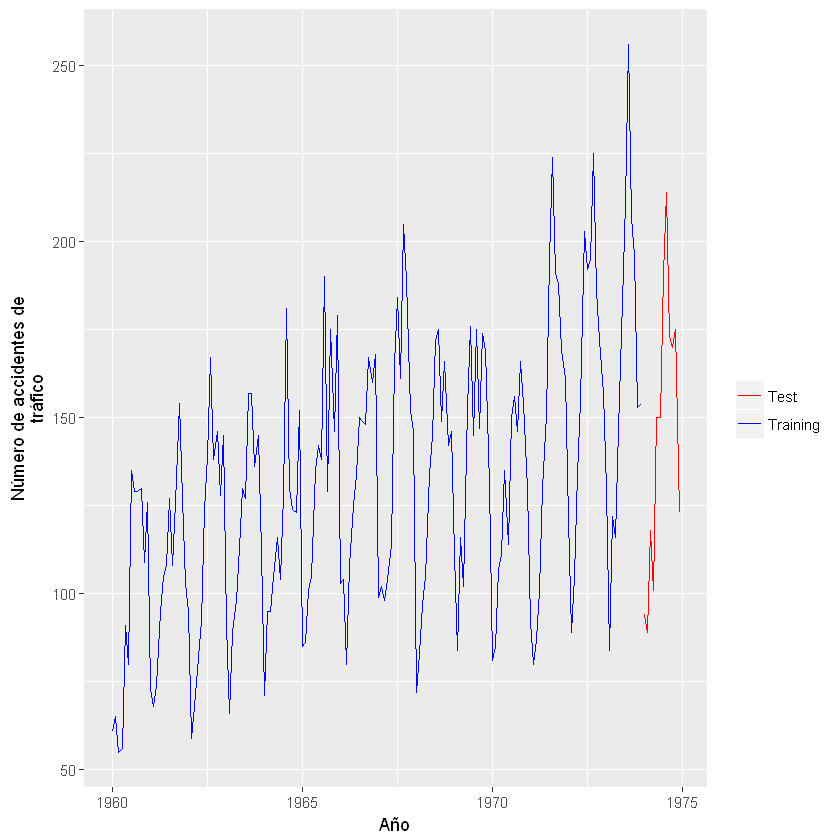

In [24]:
figura <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.train)), y = coredata(as.zoo(acc.train)), colour = 'Training')) +
  geom_line(aes(x = index(as.zoo(acc.test)), y = coredata(as.zoo(acc.test)), colour = 'Test')) +
  scale_color_manual(name = '', values = c('Training' = 'blue', 'Test' = 'red'),
                     labels = c('Test','Training')) +
  xlab('Año') + ylab('Número de accidentes de\ntráfico')
figura

#### Figura 8

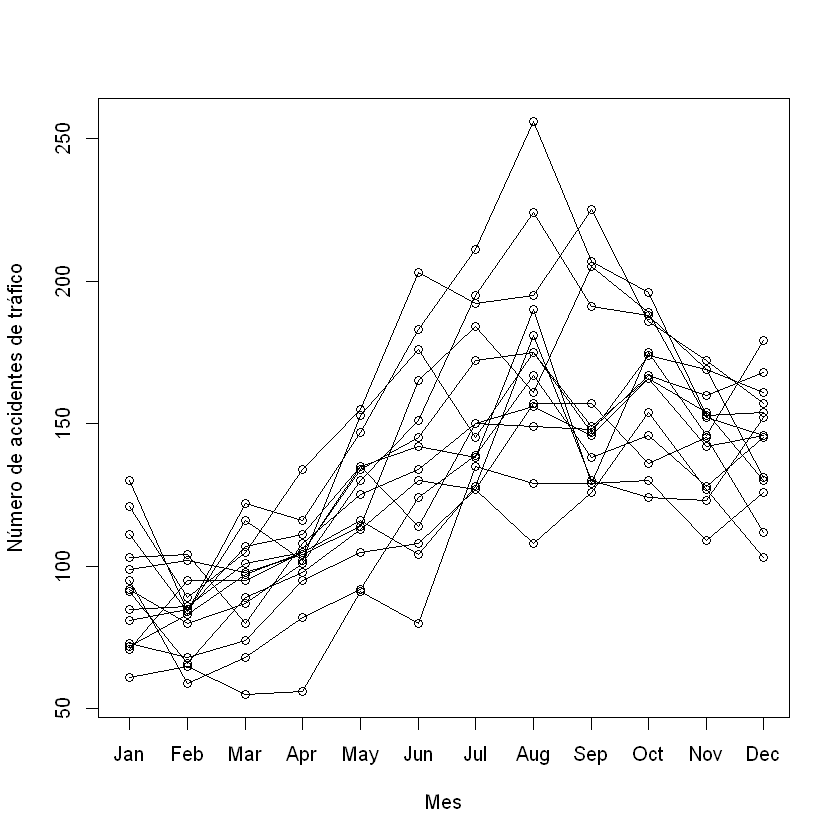

In [4]:
seasonplot(x = acc.train, s = findfrequency(acc.train),
           xlab = 'Mes', ylab = 'Número de accidentes de tráfico', main = '')

#### Figura 9

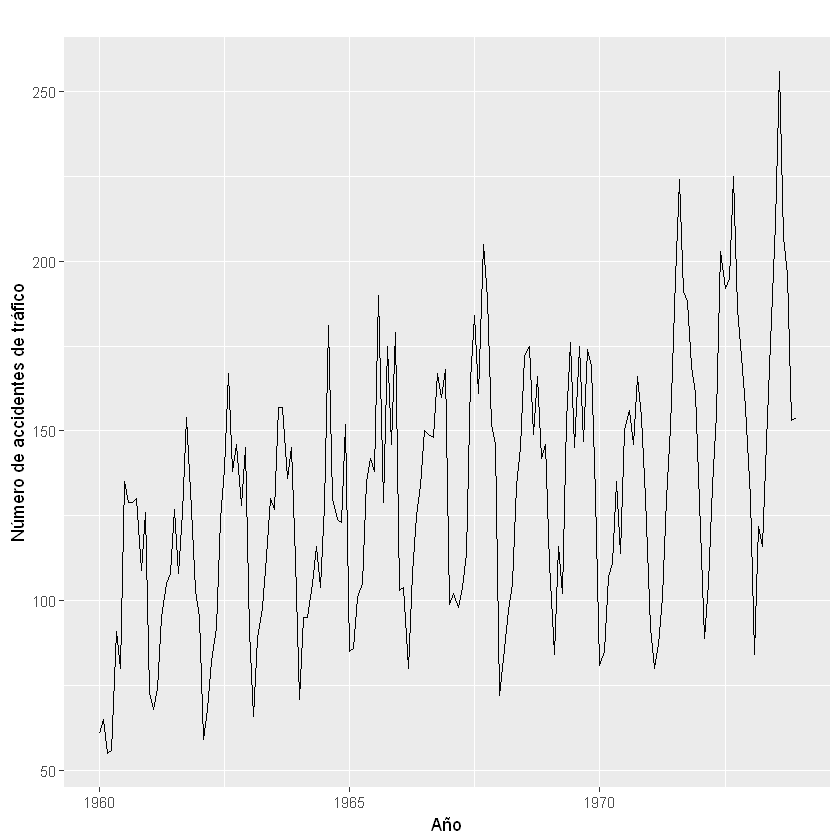

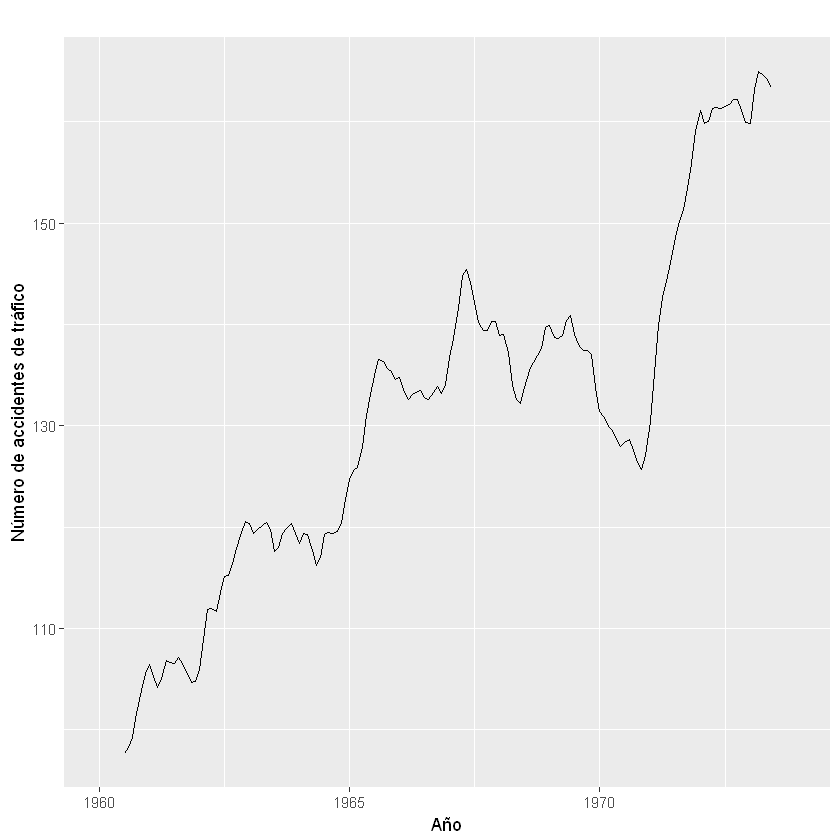

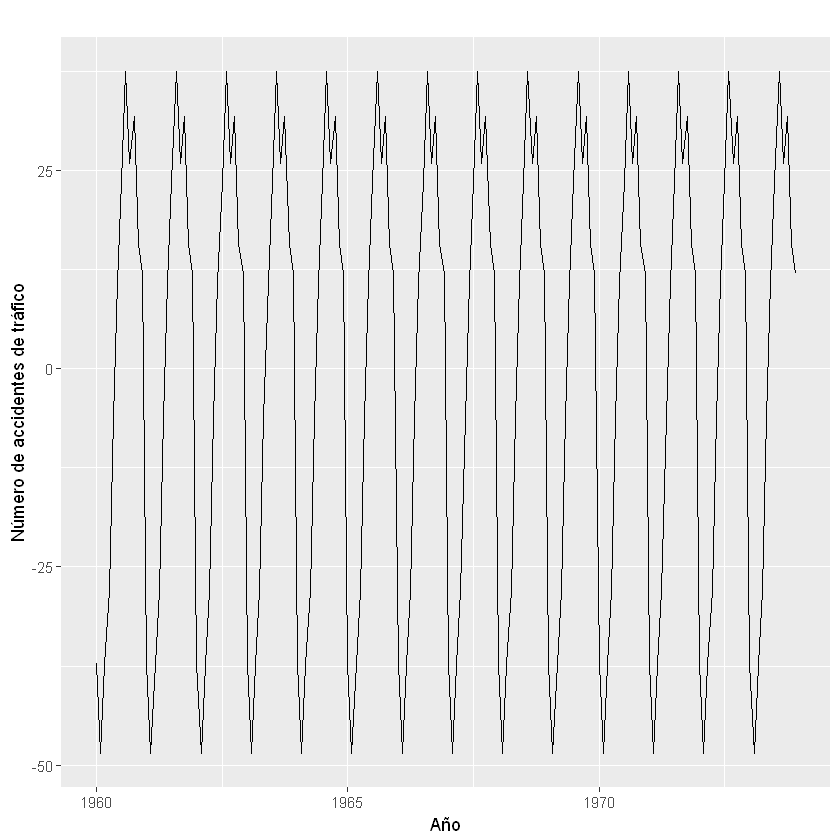

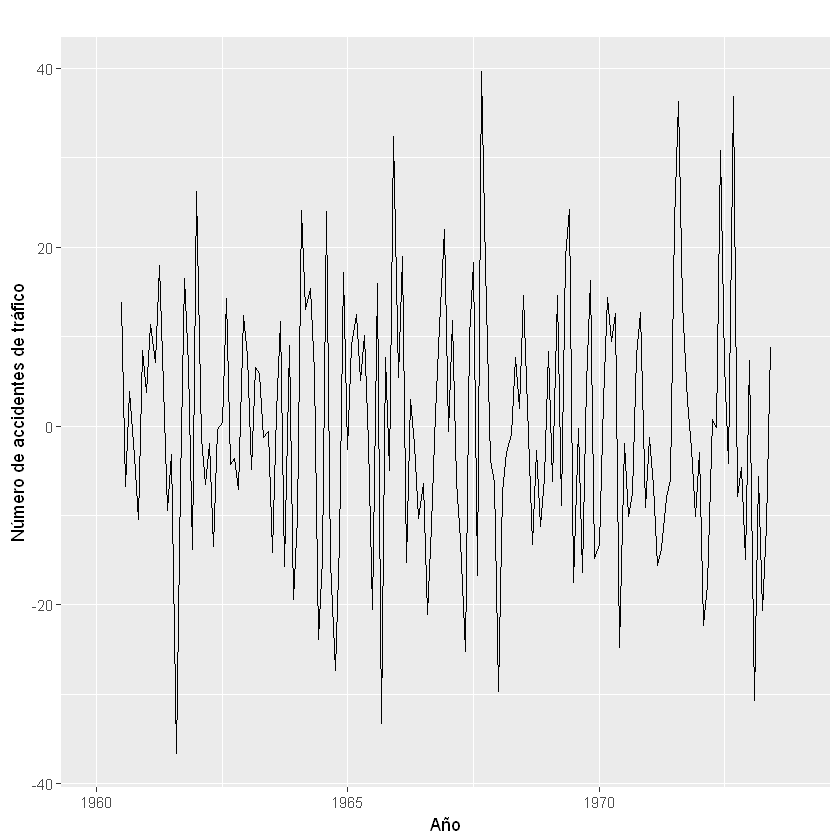

In [5]:
d <- decompose(acc.train)

componentes <- list('Serie' = acc.train,
                    'Tendencia' = d$trend,
                    'Estacionalidad' = d$seasonal,
                    'Irregular' = d$random)


autoplot(componentes$Serie, xlab = 'Año', ylab = 'Número de accidentes de tráfico', main = '')
autoplot(componentes$Tendencia, xlab = 'Año', ylab = 'Número de accidentes de tráfico', main = '')
autoplot(componentes$Estacionalidad, xlab = 'Año', ylab = 'Número de accidentes de tráfico', main = '')
autoplot(componentes$Irregular, xlab = 'Año', ylab = 'Número de accidentes de tráfico', main = '')

#### Figura 10

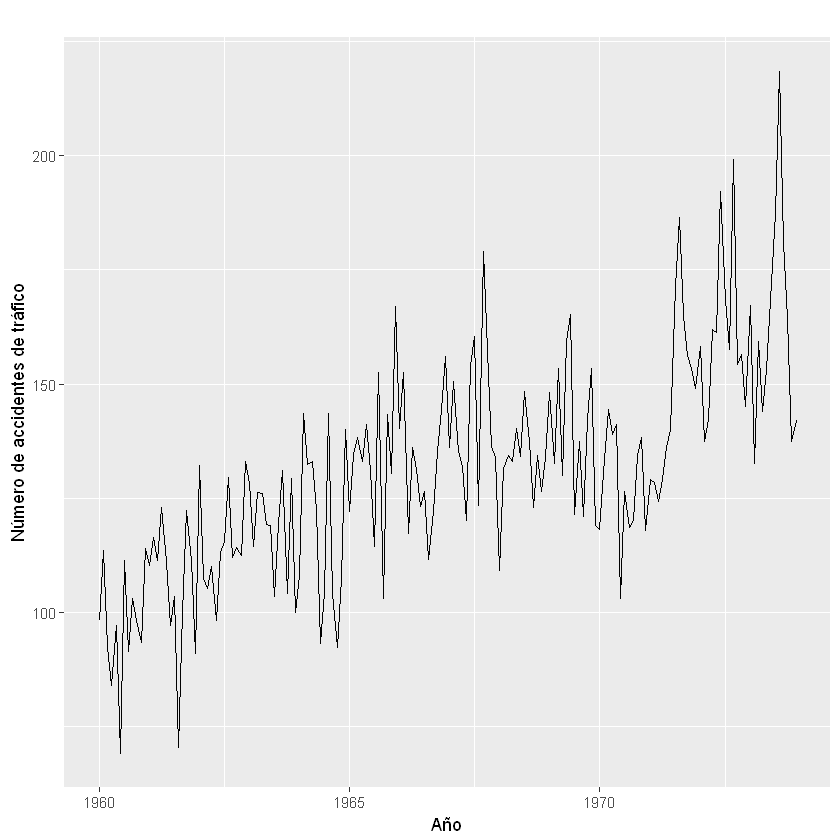

In [6]:
acc.train.decomp <- decompose(acc.train)
acc.train.seasadj <- seasadj(acc.train.decomp)
autoplot(acc.train.seasadj, xlab = 'Año', ylab = 'Número de accidentes de tráfico', main = '')

#### Figura 11

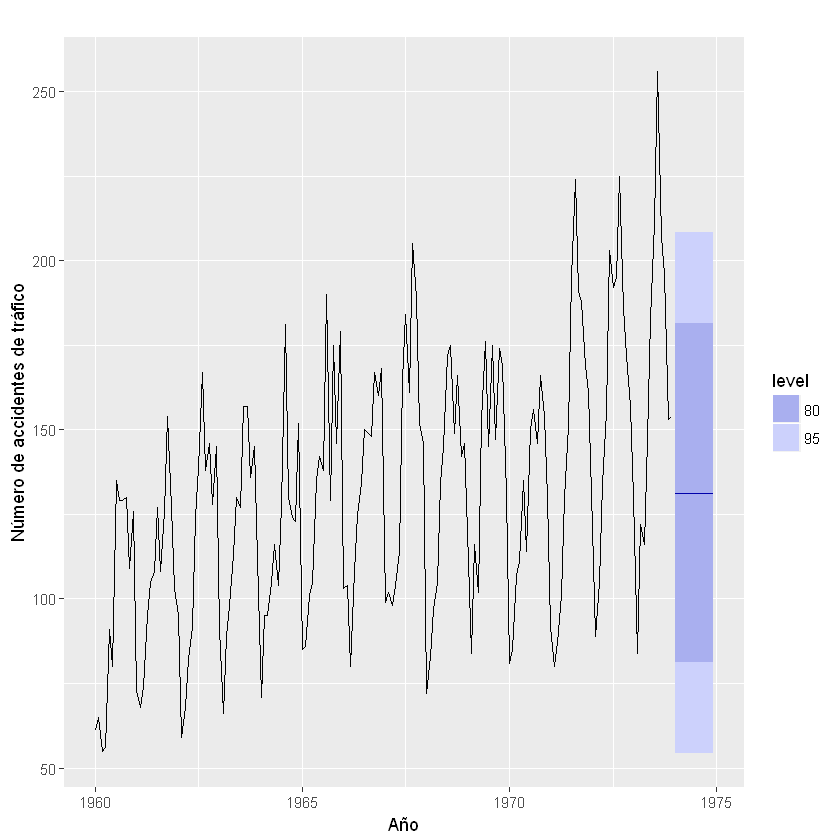

In [7]:
model <- meanf(acc.train, h = 12)
autoplot(model, xlab = 'Año', ylab = 'Número de accidentes de tráfico', main = '')

#### Figura 12


	Ljung-Box test

data:  Residuals from Mean
Q* = 687.35, df = 23, p-value < 2.2e-16

Model df: 1.   Total lags used: 24



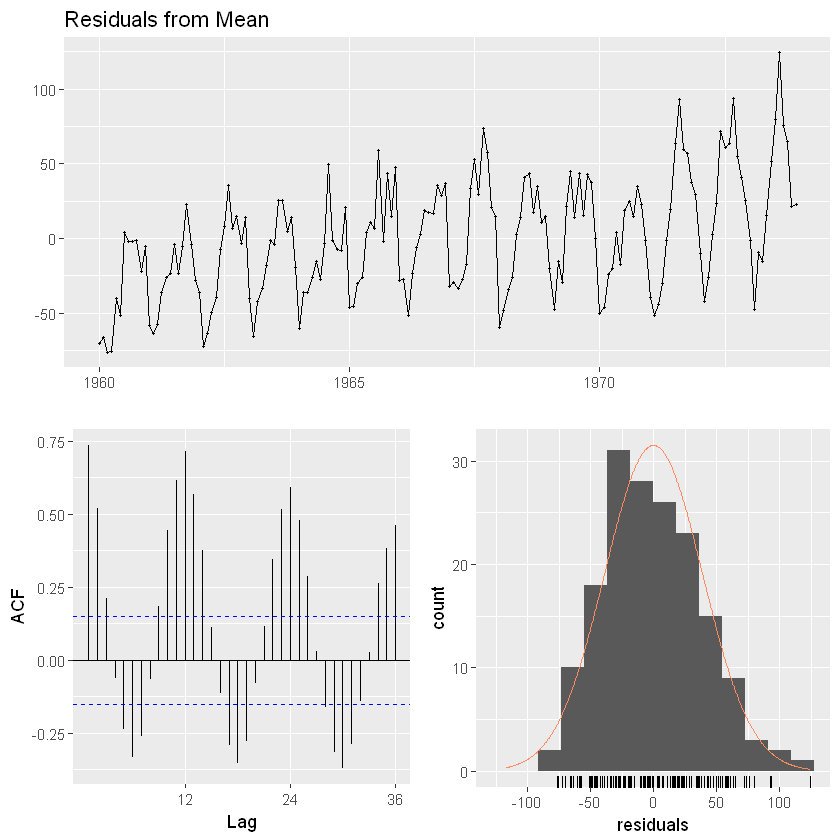

In [8]:
checkresiduals(model)

#### Figura 13

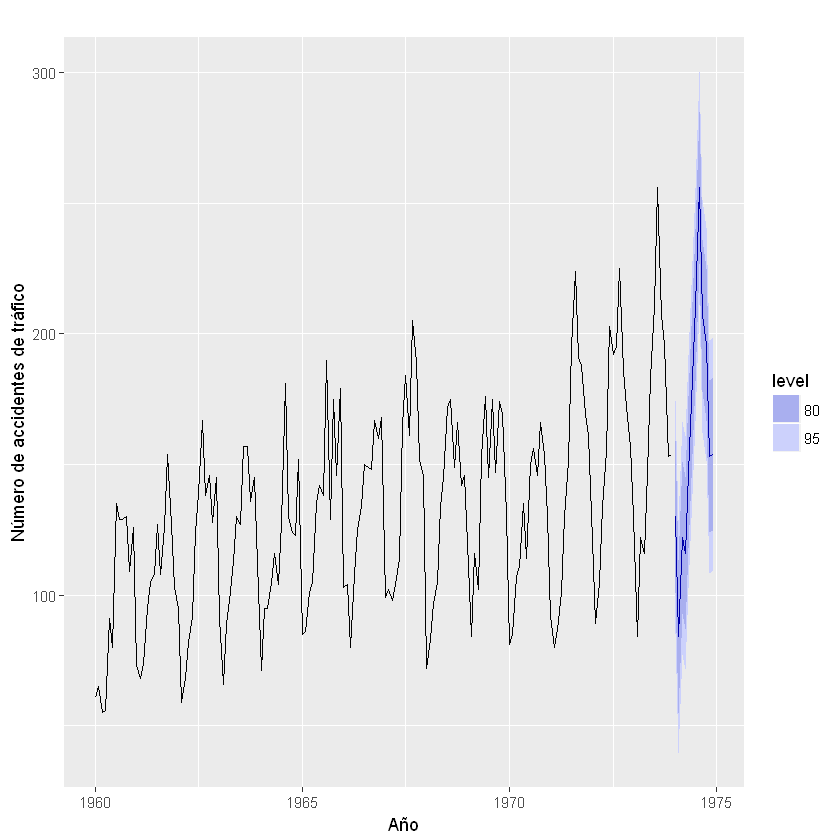

In [9]:
model <- snaive(acc.train, h = 12)
autoplot(model, xlab = 'Año', ylab = 'Número de accidentes de tráfico', main = '')

#### Figura 14

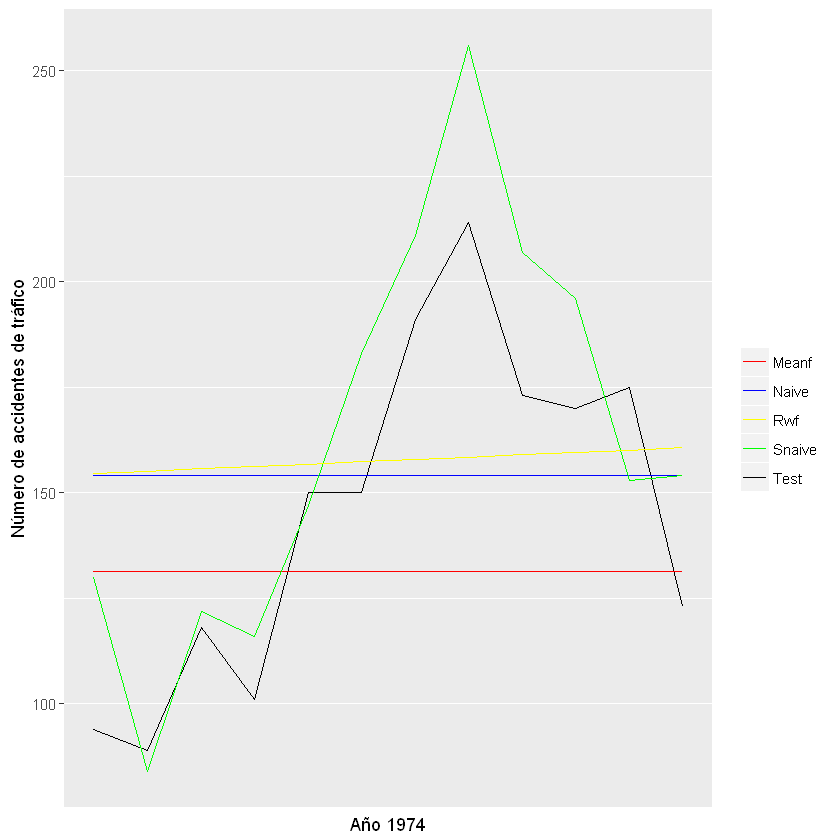

In [23]:
model.mean <- meanf(acc.train, h = 12)
model.naive <- naive(acc.train, h = 12)
model.snaive <- snaive(acc.train, h = 12)
model.rwf <- rwf(acc.train, h = 12, drift = TRUE)

figura <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.test)), y = coredata(as.zoo(acc.test)), colour = 'Test')) +
  geom_line(aes(x = index(as.zoo(acc.test)), y = model.mean$mean, colour = 'Meanf')) +
  geom_line(aes(x = index(as.zoo(acc.test)), y = model.naive$mean, colour = 'Naive')) +
  geom_line(aes(x = index(as.zoo(acc.test)), y = model.snaive$mean, colour = 'Snaive')) +
  geom_line(aes(x = index(as.zoo(acc.test)), y = model.rwf$mean, colour = 'Rwf')) +
  scale_color_manual(name = '', values = c('Test' = 'black',
                                                  'Meanf' = 'red', 'Naive' = 'blue', 'Snaive' = 'green',
                                                  'Rwf' = 'yellow'),
                     labels = c('Meanf','Naive', 'Rwf', 'Snaive', 'Test')) +
  ylab('Número de accidentes de tráfico') + xlab('Año 1974') +
  scale_x_continuous(breaks = c(), labels = c())
figura

#### Figura 15

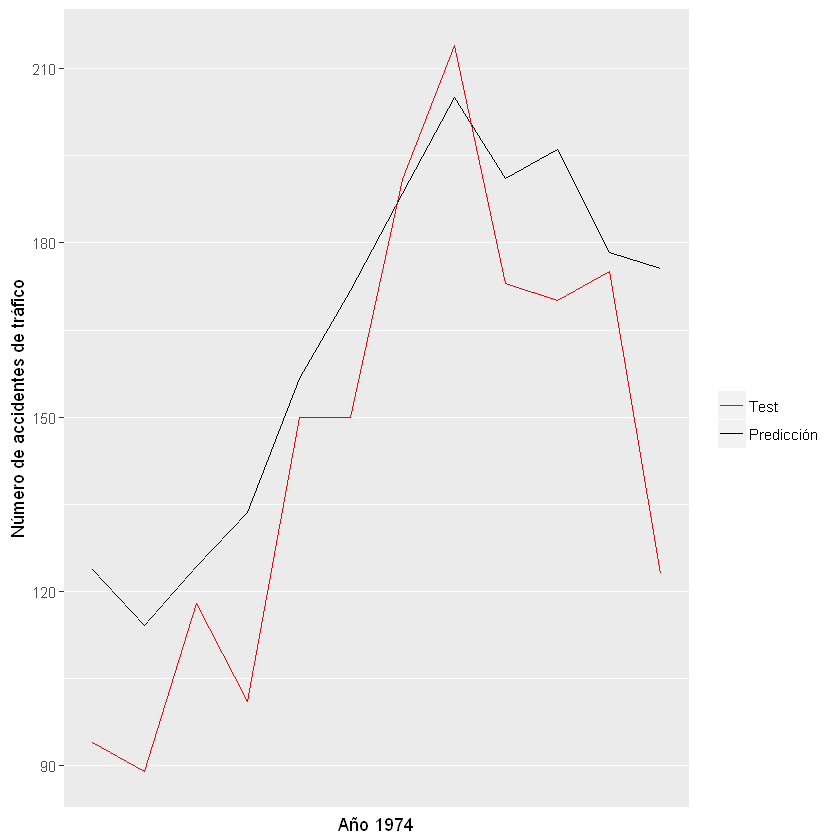

In [11]:
model <- tslm(acc.train ~ trend + season)
pred <- forecast(model, h = 12)
combine(pred$mean, acc.test)

#### Figura 16 y 17

Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


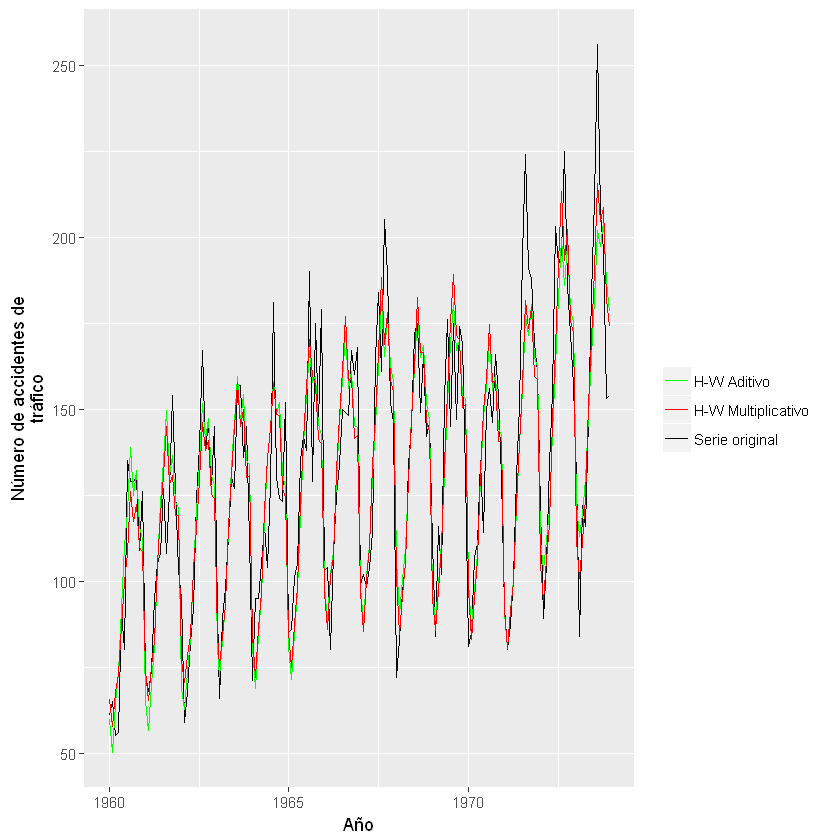

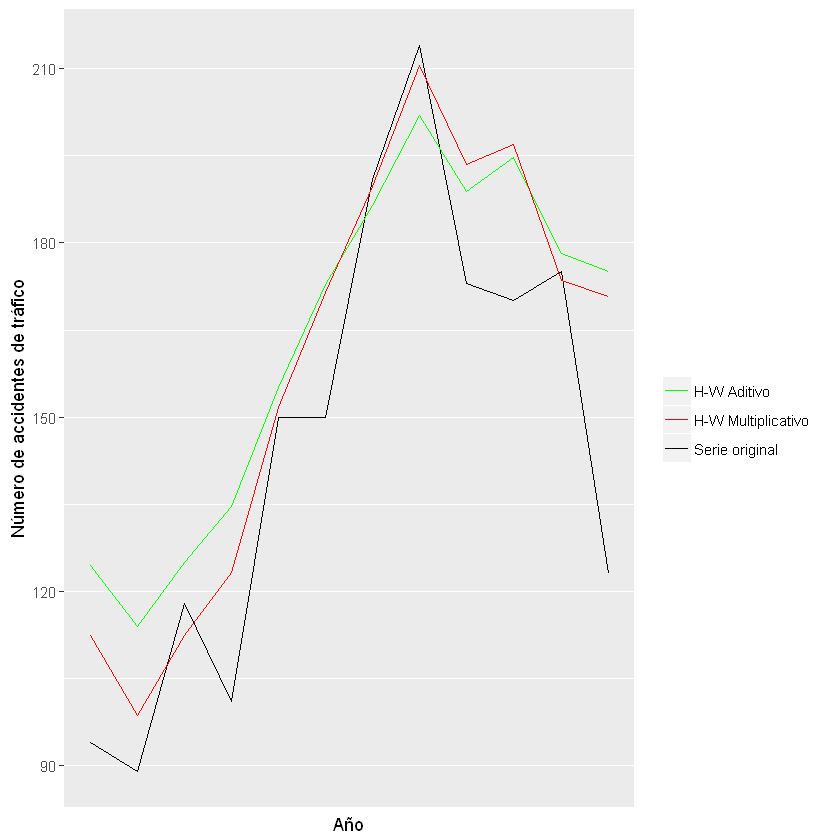

In [22]:
model.mult <- hw(acc.train, h = 12, damped = TRUE, seasonal = 'multiplicative',
                 initial = 'optimal') 

model.adit <- hw(acc.train, h = 12, damped = TRUE, seasonal = 'additive',
                 initial = 'optimal') 

figura <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.train)),
                y = coredata(as.zoo(acc.train)), colour = 'Serie original')) +
  geom_line(aes(x = index(as.zoo(fitted(model.adit))),
                y = coredata(as.zoo(fitted(model.adit))), colour = 'H-W Aditivo')) +
  geom_line(aes(x = index(as.zoo(fitted(model.mult))),
                y = coredata(as.zoo(fitted(model.mult))), colour = 'H-W Multiplicativo')) +
  scale_color_manual(name = '', values = c('Serie original' = 'black', 'H-W Multiplicativo' = 'red',
                                                  'H-W Aditivo' = 'green'),
                     labels = c('H-W Aditivo','H-W Multiplicativo','Serie original')) +
  xlab('Año') + ylab('Número de accidentes de\ntráfico')
figura

figura <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.test)), y = coredata(as.zoo(acc.test)), colour = 'Serie original')) +
  geom_line(aes(x = index(as.zoo(acc.test)), y = model.adit$mean, colour = 'H-W Aditivo')) +
  geom_line(aes(x = index(as.zoo(acc.test)), y = model.mult$mean, colour = 'H-W Multiplicativo')) +
  scale_color_manual(name = '', values = c('Serie original' = 'black', 'H-W Multiplicativo' = 'red',
                                                  'H-W Aditivo' = 'green'),
                     labels = c('H-W Aditivo','H-W Multiplicativo','Serie original')) +
  xlab('Año') + ylab('Número de accidentes de tráfico') + scale_x_continuous(breaks = c(), labels = c())
figura

#### Figura 18

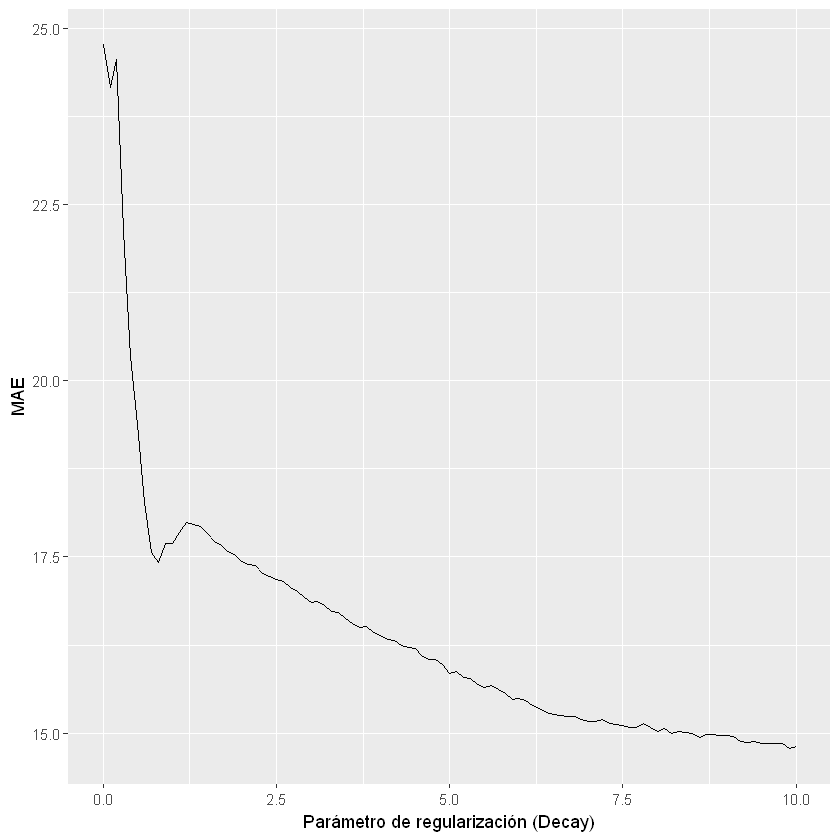

In [21]:
#install.packages('Metrics')
library(Metrics)

metrics.decay <- c()
for (i in seq(0, 10, 0.1)) {
  model <- nnetar(acc.train, decay = i)
  pred <- forecast(model, h = 12)
  metrics.decay <- c(metrics.decay, mae(pred$mean, acc.test))
}
m.decay <- data.frame(decay = seq(0, 10, 0.1), MAE = metrics.decay)

figura <- ggplot() +
  geom_line(data = m.decay, aes(x = decay, y = MAE)) +
  xlab('Parámetro de regularización (Decay)') + ylab('MAE')
figura

#### Figura 19

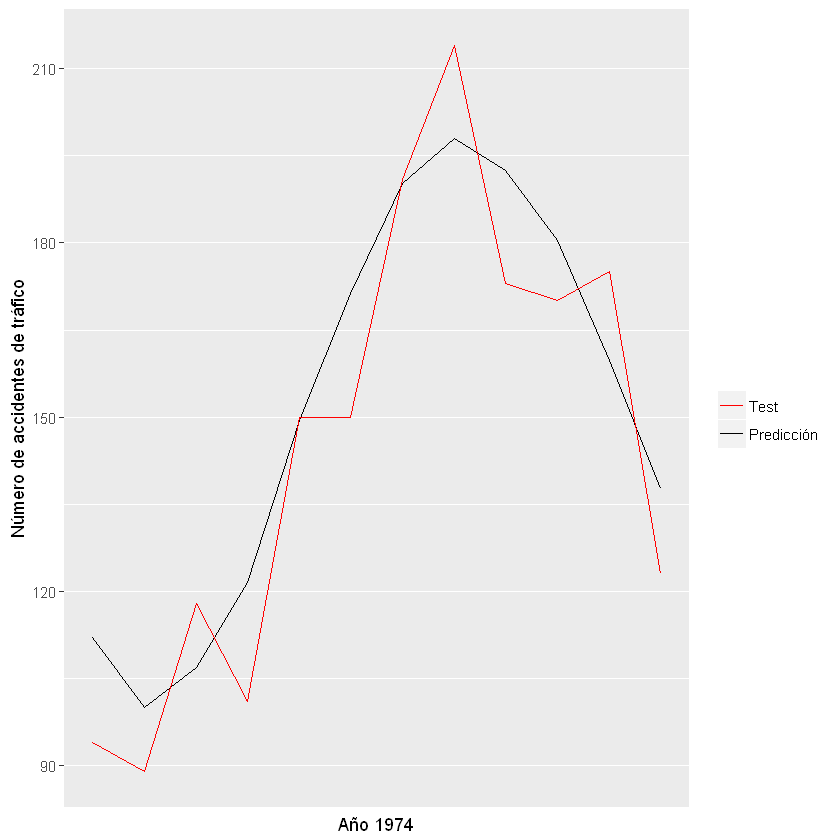

In [15]:
model <- nnetar(acc.train, repeats = 25, size = 20, decay = 9.5, p = 20, P = 4)
pred <- forecast(model, h = 12)
combine(pred$mean, acc.test)

#### Figura 20

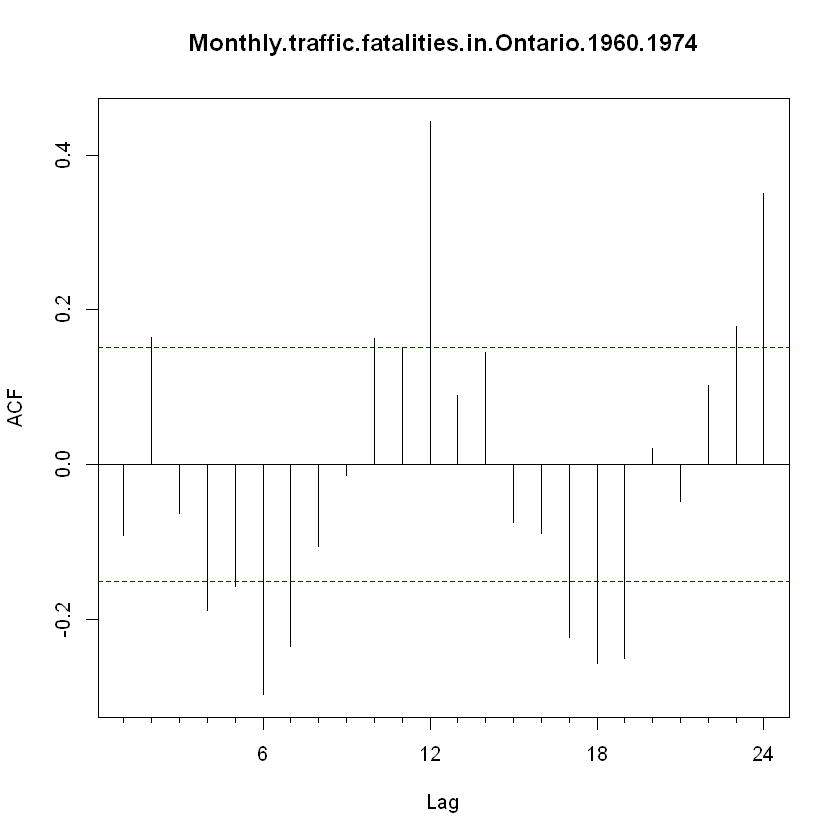

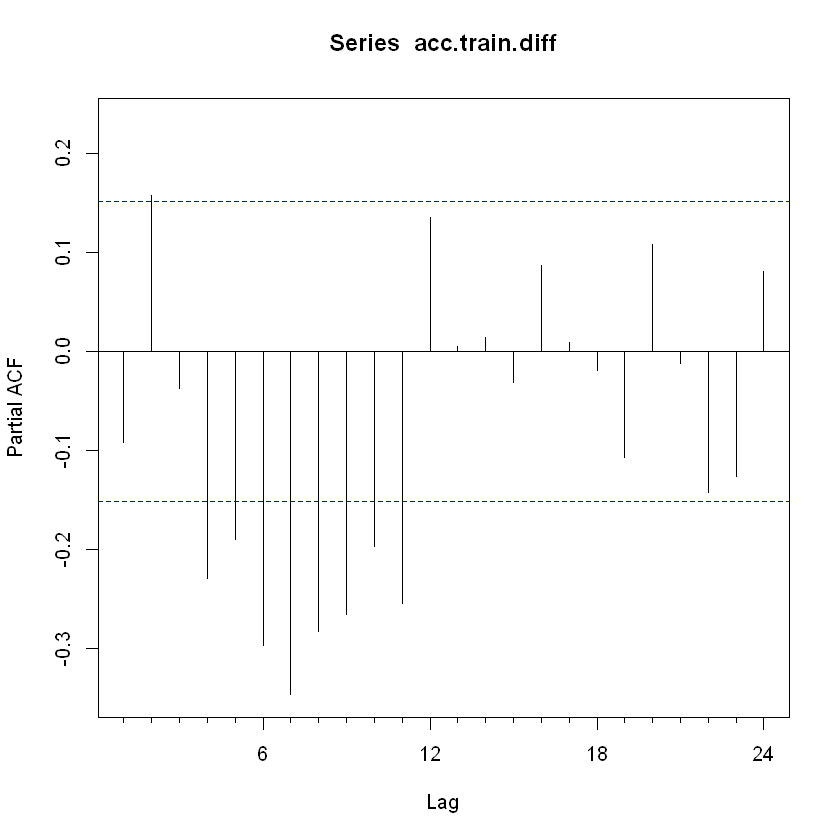

In [17]:
acc.train.diff <- diff(acc.train)
Acf(acc.train.diff)
Pacf(acc.train.diff)

#### Figura 21

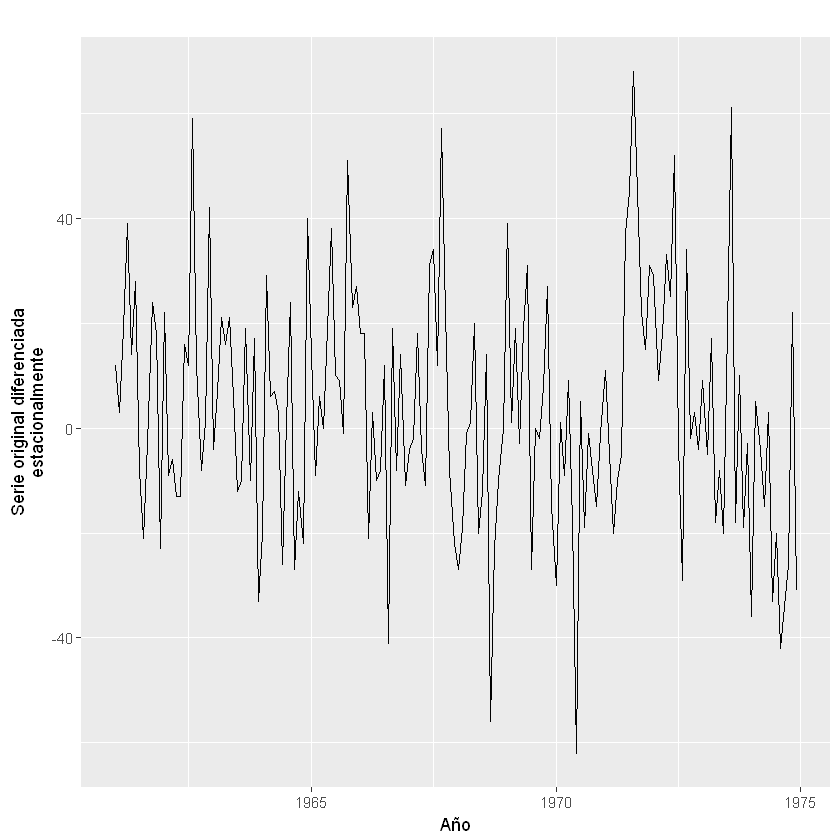

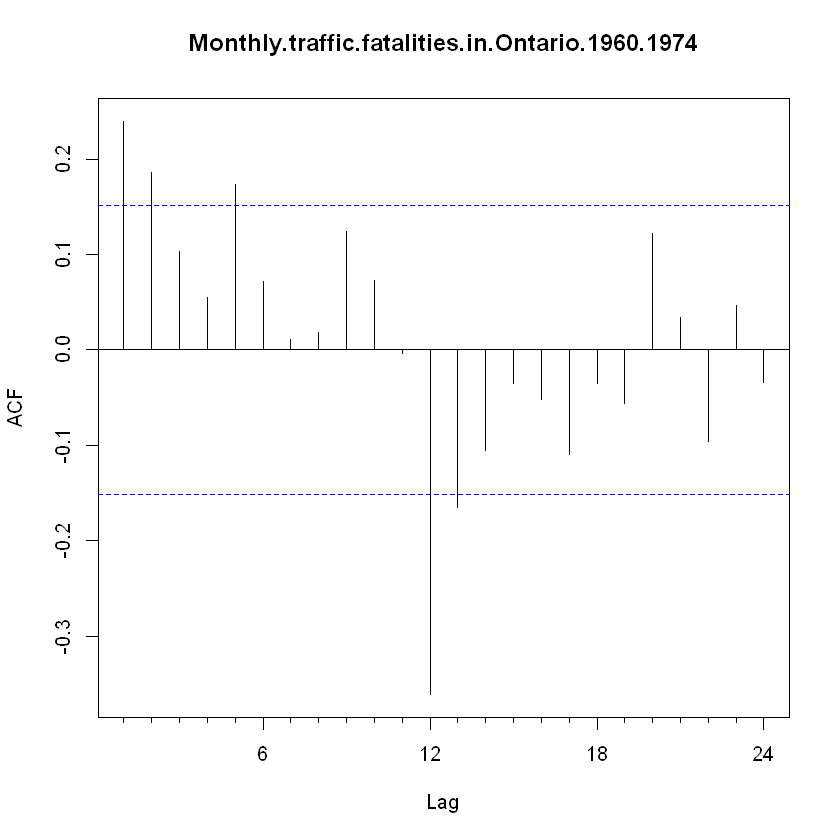

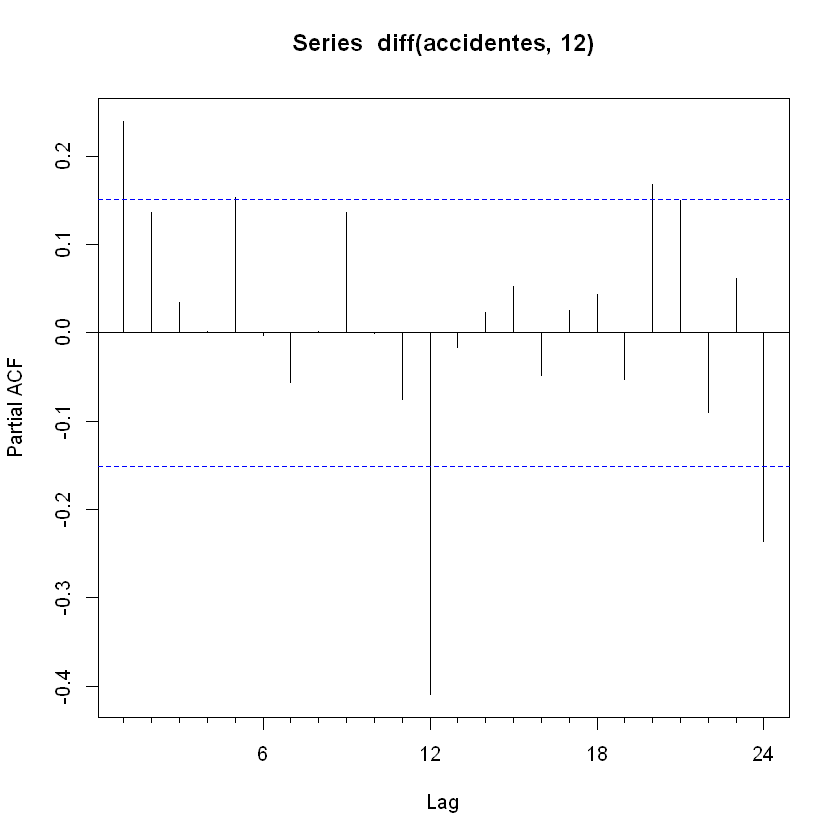

In [19]:
autoplot(diff(accidentes, 12), xlab = 'Año', ylab = 'Serie original diferenciada\nestacionalmente',
         main = '')
Acf(diff(accidentes, 12))
Pacf(diff(accidentes, 12))

#### Figura 22

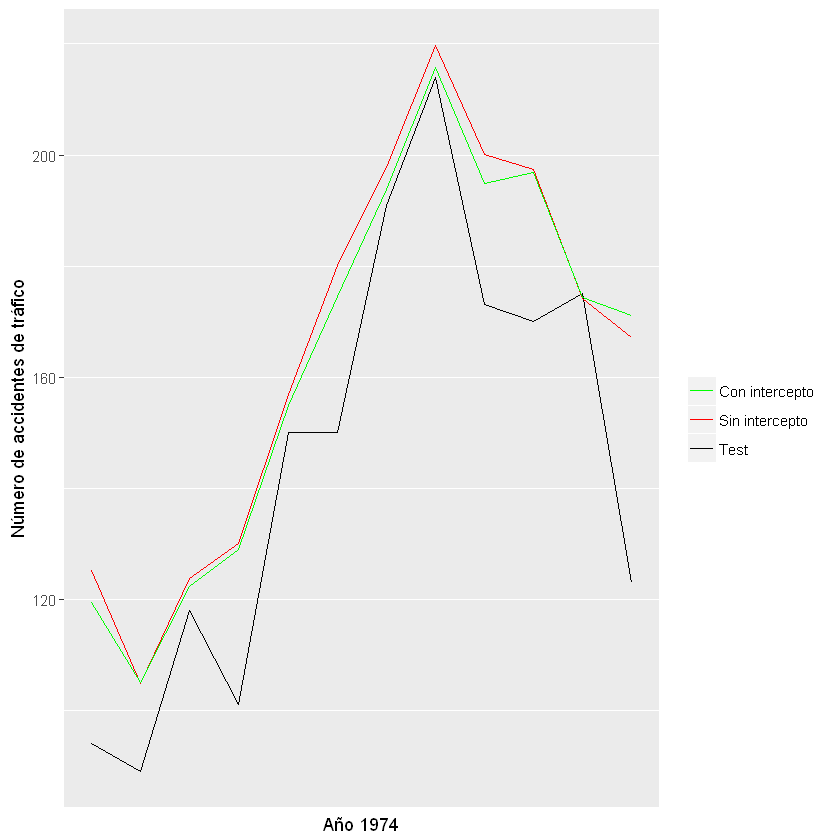

In [20]:
model.sin <- Arima(acc.train, order = c(1,0,1), seasonal = c(2,1,1), include.drift = FALSE)
pred.sin <- forecast(model.sin, h = 12)
model.con <- Arima(acc.train, order = c(1,0,1), seasonal = c(2,1,1), include.drift = TRUE)
pred.con <- forecast(model.con, h = 12)

figura <- ggplot() +
  geom_line(aes(x = index(as.zoo(acc.test)), y = coredata(as.zoo(acc.test)), colour = 'Test')) +
  geom_line(aes(x = index(as.zoo(acc.test)), y = pred.sin$mean, colour = 'Sin intercepto')) +
  geom_line(aes(x = index(as.zoo(acc.test)), y = pred.con$mean, colour = 'Con intercepto')) +
  scale_color_manual(name = '', values = c('Test' = 'black', 'Sin intercepto' = 'red',
                                                  'Con intercepto' = 'green'),
                     labels = c('Con intercepto', 'Sin intercepto', 'Test')) + ylab('Número de accidentes de tráfico') +
  xlab('Año 1974') + scale_x_continuous(breaks = c(), labels = c())
figura

#### Figura 23

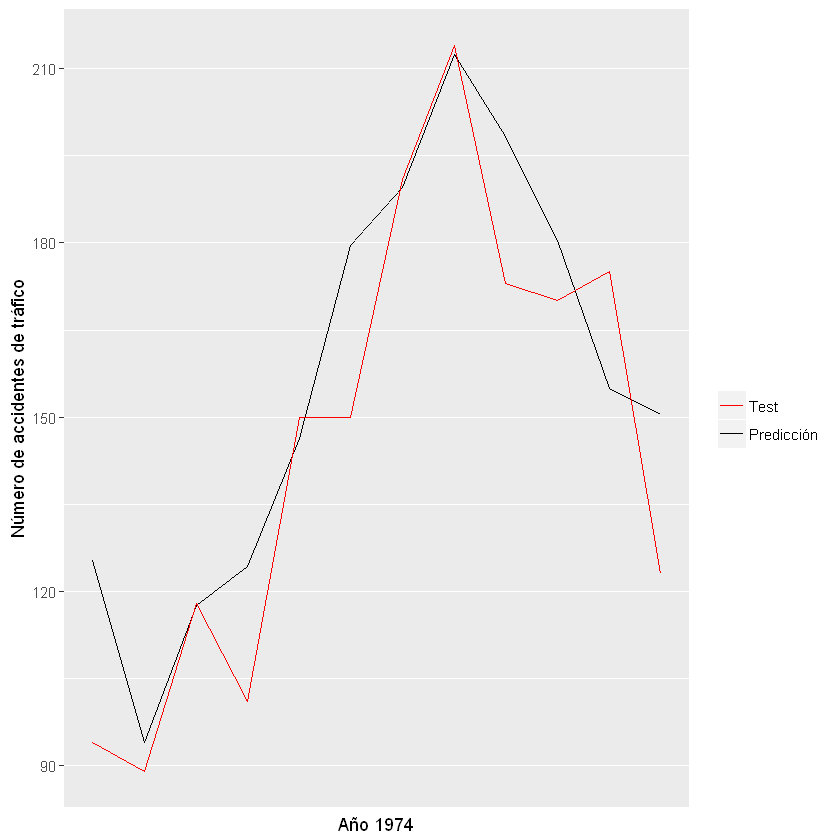

In [25]:
model <- auto.arima(acc.train, test = 'adf', max.order = 7, stepwise = FALSE, approximation = FALSE)
pred <- forecast(model, h = 12)
combine(pred$mean, acc.test)